In [1]:
import pickle
from matplotlib import pyplot as plt
from jax import numpy as jnp

I0000 00:00:1696437402.055510  244413 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Text(0.5, 1.0, 'zeta')

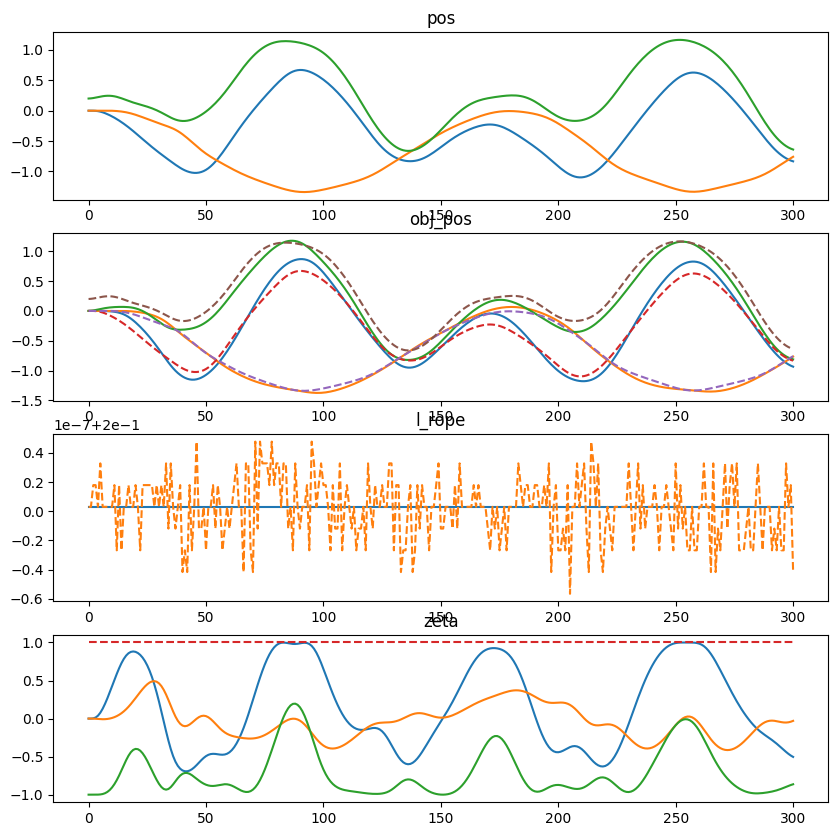

In [2]:
file_path = "../../results/state_seq.pkl"
with open(file_path, "rb") as f:
    state_seq = pickle.load(f)

# plot the state sequence
start = 0
end = len(state_seq)
pos = jnp.asarray([state_seq[i].pos for i in range(start, end)])
pos_obj = jnp.asarray([state_seq[i].pos_obj for i in range(start, end)])
pos_hook = jnp.asarray([state_seq[i].pos_hook for i in range(start, end)])
l_rope = jnp.asarray([state_seq[i].l_rope for i in range(start, end)])
f_rope_norm = jnp.asarray([state_seq[i].f_rope_norm for i in range(start, end)])
zeta = jnp.asarray([state_seq[i].zeta for i in range(start, end)])

plt.figure(figsize=(10, 10))
plt.subplot(411)
plt.plot(pos)
plt.title("pos")
plt.subplot(412)
plt.plot(pos_obj)
plt.plot(pos_hook, '--')
plt.title("obj_pos")
plt.subplot(413)
plt.plot(l_rope)
plt.plot(jnp.linalg.norm(pos_obj - pos_hook, axis=1), '--')
plt.title("l_rope")
plt.subplot(414)
plt.plot(zeta)
plt.plot(jnp.linalg.norm(zeta, axis=1), '--')
plt.title("zeta")